In [1]:
#  Copyright 2022 Shailendra Bhandari Github link: https:https://github.com/Shailendra995/Acit4530_final_project
#    Licensed under the Apache License, Version 2.0 (the "License");
#    you may not use this file except in compliance with the License.
#    You may obtain a copy of the License at
#
#        http://www.apache.org/licenses/LICENSE-2.0
#
#    Unless required by applicable law or agreed to in writing, software
#    distributed under the License is distributed on an "AS IS" BASIS,
#    WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#    See the License for the specific language governing permissions and
#    limitations under the License.

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# get the features from the file features.txt
features = list()
with open('/media/shailendra/New Volume1/Master_Data_Science_Oslo_met/Second_Sem/Data_mining_project/UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [3]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('/media/shailendra/New Volume1/Master_Data_Science_Oslo_met/Second_Sem/Data_mining_project/UCI_HAR_Dataset/train/X_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
X_train.columns = features

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('/media/shailendra/New Volume1/Master_Data_Science_Oslo_met/Second_Sem/Data_mining_project/UCI_HAR_Dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('/media/shailendra/New Volume1/Master_Data_Science_Oslo_met/Second_Sem/Data_mining_project/UCI_HAR_Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2502,0.405964,0.006361,-0.019844,-0.001265,0.338863,0.425767,-0.081316,0.278668,0.40253,0.373584,...,-0.108519,0.668057,-0.921377,0.574019,-0.473339,0.284593,0.334981,14,3,WALKING_DOWNSTAIRS


In [4]:
train.shape

(7352, 564)

In [5]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('/media/shailendra/New Volume1/Master_Data_Science_Oslo_met/Second_Sem/Data_mining_project/UCI_HAR_Dataset/test/X_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
X_test.columns = features
# add subject column to the dataframe
X_test['subject'] = pd.read_csv('/media/shailendra/New Volume1/Master_Data_Science_Oslo_met/Second_Sem/Data_mining_project/UCI_HAR_Dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('/media/shailendra/New Volume1/Master_Data_Science_Oslo_met/Second_Sem/Data_mining_project/UCI_HAR_Dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2091,0.278749,-0.012391,-0.107983,-0.996765,-0.988533,-0.991908,-0.997011,-0.987925,-0.991776,-0.941547,...,-0.018573,0.231182,0.148528,0.056526,-0.930625,0.135601,0.049779,18,4,SITTING


In [6]:
test.shape

(2947, 564)

In [7]:
train.columns


Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

In [8]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


In [9]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


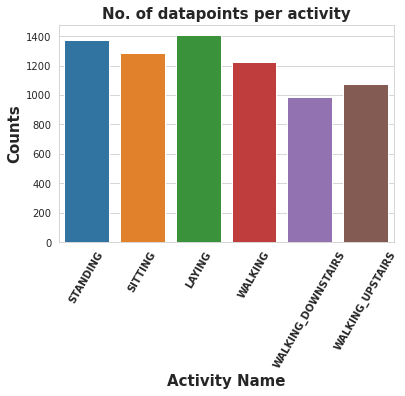

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.title('No. of datapoints per activity',fontweight='bold', fontsize=15)
sns.countplot(train.ActivityName)
plt.xlabel('Activity Name', fontsize=15,fontweight='bold' )
plt.ylabel('Counts', fontsize=15,fontweight='bold' )
plt.xticks(rotation=60, fontweight = 'bold')
plt.savefig('results_images/datapoint_classification.pdf')
plt.show()

In [11]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '_')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAcc_mean_X', 'tBodyAcc_mean_Y', 'tBodyAcc_mean_Z',
       'tBodyAcc_std_X', 'tBodyAcc_std_Y', 'tBodyAcc_std_Z', 'tBodyAcc_mad_X',
       'tBodyAcc_mad_Y', 'tBodyAcc_mad_Z', 'tBodyAcc_max_X',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

In [12]:
'''sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in train.columns[0:10]:
    index = index + 1
    fig = sns.kdeplot(train[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(False)
plt.legend(loc='upper left')
plt.show(fig)'''

'sns.set(rc={\'figure.figsize\':(15,7)})\ncolours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]\nindex = -1\nfor i in train.columns[0:10]:\n    index = index + 1\n    fig = sns.kdeplot(train[i] , shade=True, color=colours[index])\nplt.xlabel("Features")\nplt.ylabel("Value")\nplt.title("Feature Distribution")\nplt.grid(False)\nplt.legend(loc=\'upper left\')\nplt.show(fig)'

# Saving this data frame in CSV files

In [13]:
train.to_csv('/media/shailendra/New Volume1/Master_Data_Science_Oslo_met/Second_Sem/Data_mining_project/UCI_HAR_Dataset/csv_files/train.csv', index=False)
test.to_csv('/media/shailendra/New Volume1/Master_Data_Science_Oslo_met/Second_Sem/Data_mining_project/UCI_HAR_Dataset/csv_files/test.csv', index=False)

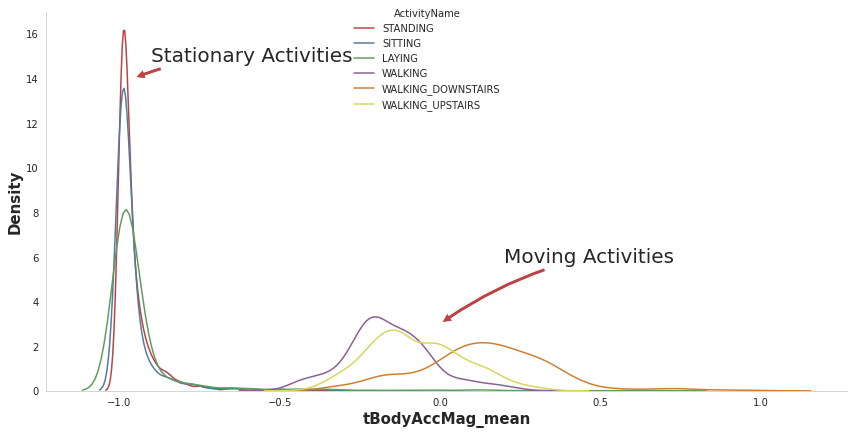

In [14]:
sns.set_palette("Set1", desat=0.60)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag_mean', hist=False)\
    .add_legend(loc='upper center')
plt.annotate("Stationary Activities", xy=(-0.956,14), xytext=(-0.9, 15), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 6), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.xlabel('tBodyAccMag_mean', fontsize=15,fontweight='bold' )
plt.ylabel('Density', fontsize=15,fontweight='bold' )
plt.grid(False)
plt.savefig('results_images/moving_and_stationary.pdf')
plt.show()

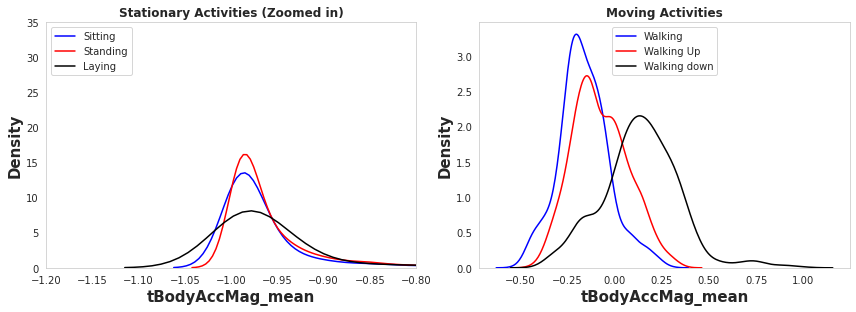

In [15]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.title('Stationary Activities (Zoomed in)', fontweight="bold")
sns.distplot(df4['tBodyAccMag_mean'],color = 'b',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMag_mean'],color = 'r',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMag_mean'],color = 'k',hist = False, label = 'Laying')
plt.axis([-1.2, -0.8, 0, 35])
plt.legend(loc='upper left')
plt.grid(False)
plt.xlabel('tBodyAccMag_mean', fontsize=15,fontweight='bold' )
plt.ylabel('Density', fontsize=15,fontweight='bold' )

plt.subplot(2,2,2)
plt.title('Moving Activities',  fontweight="bold")
sns.distplot(df1['tBodyAccMag_mean'],color = 'blue',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMag_mean'],color = 'red',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMag_mean'],color = 'black',hist = False, label = 'Walking down')
plt.legend(loc='upper center')
plt.grid(False)
plt.tight_layout()
plt.xlabel('tBodyAccMag_mean', fontsize=15,fontweight='bold' )
plt.ylabel('Density', fontsize=15,fontweight='bold' )
plt.savefig('results_images/moving_stat_zoomed.pdf')
plt.show()

# Train and Test Data

In [16]:
train = pd.read_csv('/media/shailendra/New Volume1/Master_Data_Science_Oslo_met/Second_Sem/Data_mining_project/UCI_HAR_Dataset/csv_files/train.csv')
test = pd.read_csv('/media/shailendra/New Volume1/Master_Data_Science_Oslo_met/Second_Sem/Data_mining_project/UCI_HAR_Dataset/csv_files/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [17]:
train.head(1)

,tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tBodyAcc_std_X,tBodyAcc_std_Y,tBodyAcc_std_Z,tBodyAcc_mad_X,tBodyAcc_mad_Y,tBodyAcc_mad_Z,tBodyAcc_max_X,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING


In [18]:

# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))


X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


# Now the next task is to model our data

In [19]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'] # the activities

In [20]:
import itertools #####Itertools is a module in python,\
#it is used to iterate over data structures that can be stepped over using a for-loop
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
from datetime import datetime    # to import time at which model starts training 
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    # to store results at various phases
    results = dict()
    
 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(10,8))
    plt.grid(b=True)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Confusion Matrix', cmap=plt.cm.Blues)#, cmap = cm_cmap)
    plt.show()
    
    # to get the classification classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

In [22]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No. of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))
    


# I. Logistic Regression with Grid Search


In [23]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV


training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


/home/shailendra/anaconda3/envs/jupyter-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/shailendra/anaconda3/envs/jupyter-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/home/shailendra/anaconda3/envs/jupyter-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/shailendra/anaconda3/envs/jupyter-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Done 
 

training_time(HH:MM:SS.ms) - 0:00:20.450700


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.007905


---------------------
|      Accuracy      |
---------------------

    0.9582626399728538


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 429  59   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   4 404  12]
 [  0   0   0  24   1 446]]


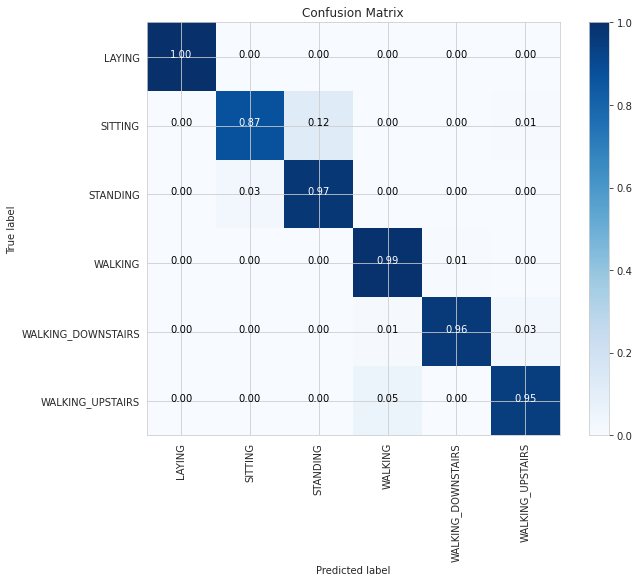

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.87      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.98       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [24]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)


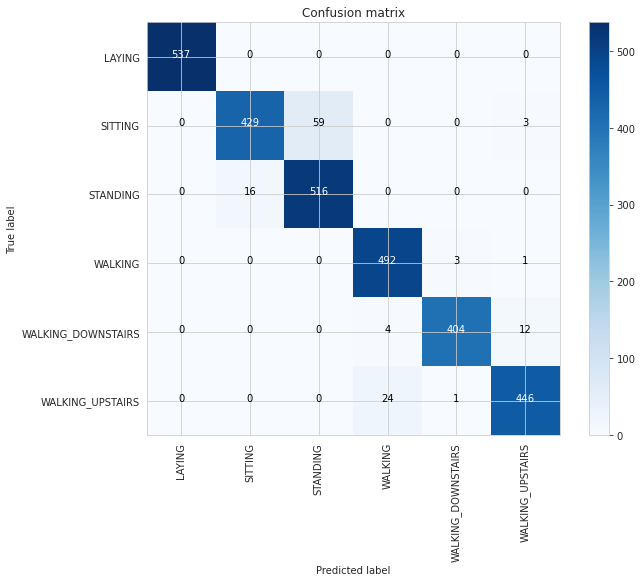

In [25]:
plt.figure(figsize=(10,8))
plt.grid(b=True)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Blues, )
plt.savefig('results_images/confusion_m_classLR.pdf')
plt.show()

In [26]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=1)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1, 'penalty': 'l2'}

---------------------------------
|   No. of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9368895661079609



# II. Linear SVC with GridSearch

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/home/shailendra/anaconda3/envs/jupyter-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/shailendra/anaconda3/envs/jupyter-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/shailendra/anaconda3/envs/jupyter-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/shailendra/anaconda3/envs/jupyter-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/shailendra/anaconda3/envs/jupyter-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.w

Done 
 

training_time(HH:MM:SS.ms) - 0:01:01.747646


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.006316


---------------------
|      Accuracy      |
---------------------

    0.9667458432304038


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 428  58   0   0   3]
 [  0   9 522   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 412   5]
 [  0   0   0  17   0 454]]


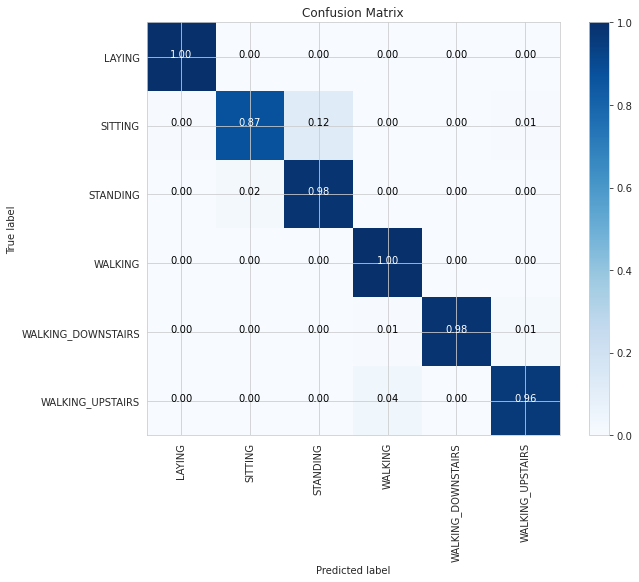

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [27]:
from sklearn.svm import LinearSVC
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=8, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [28]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.5, tol=5e-05)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.5}

---------------------------------
|   No. of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9423364179118282



# III. Decision Trees with GridSearchCV

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:11.013868


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.006727


---------------------
|      Accuracy      |
---------------------

    0.8717339667458432


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 372 119   0   0   0]
 [  0  61 471   0   0   0]
 [  0   0   0 471  19   6]
 [  0   0   0  19 354  47]
 [  0   0   0  65  42 364]]


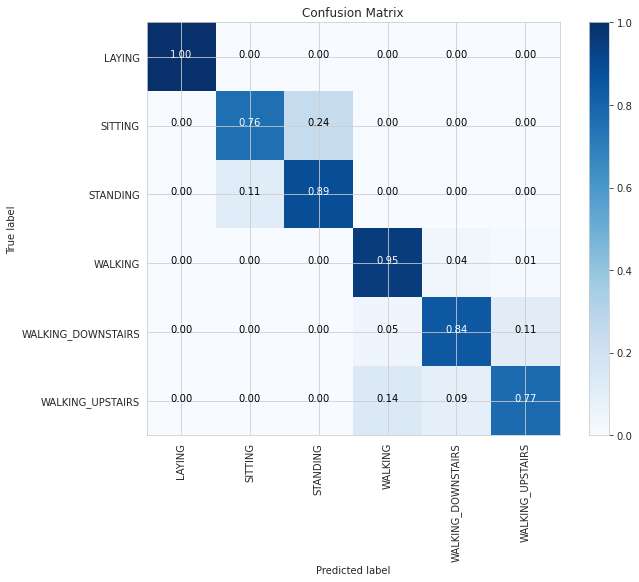

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.76      0.81       491
          STANDING       0.80      0.89      0.84       532
           WALKING       0.85      0.95      0.90       496
WALKING_DOWNSTAIRS       0.85      0.84      0.85       420
  WALKING_UPSTAIRS       0.87      0.77      0.82       471

          accuracy                           0.87      2947
         macro avg       0.87      0.87      0.87      2947
      weighted avg       0.87      0.87      0.87      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(max_depth=9)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 9}

---------------------------------
|   No. of CrossValidation set

In [29]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=8)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])




# Comparing the results from models

In [30]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))


print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))




                     Accuracy     Error
                     ----------   --------
Logistic Regression : 95.83%       4.174%
Linear SVC          : 96.67%       3.325% 
DecisionTree        : 87.17%      12.83% 


# LSTM RNN Model 

In [31]:
# Importing libraries
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

2022-05-16 14:03:02.248499: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shailendra/rsoftware/root/lib/:/home/shailendra/rsoftware/root/lib:/home/shailendra/CLHEP/2.4.1.0-install/lib/:/home/shailendra/geant4/geant4.10.05.p01-build/BuildProducts/lib:/home/shailendra/geant4/geant4.10.05.p01-install/lib:/usr/lib/x86_64-linux-gnu/usr/lib:/usr/local/lib:/Applications/autotools/lib:/home/shailendra/CLHEP/2.4.1.0-install/lib:/home/shailendra/geant4/geant4.10.05.p01-install/lib:/home/shailendra/rsoftware/root/lib:/usr/local/lib:/usr/lib:/home/shailendra/anaroot/lib:/home/shailendra/geant4/geant4.10.05.p01-install/lib
2022-05-16 14:03:02.248521: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [32]:
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [33]:
# Data directory
DATADIR = '/media/shailendra/New Volume1/Master_Data_Science_Oslo_met/Second_Sem/Data_mining_project/UCI_HAR_Dataset'
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]


In [34]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'/media/shailendra/New Volume1/Master_Data_Science_Oslo_met/Second_Sem/Data_mining_project/UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).to_numpy()#as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))


In [35]:
def load_y(subset):
    filename = f'/media/shailendra/New Volume1/Master_Data_Science_Oslo_met/Second_Sem/Data_mining_project/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).to_numpy()#as_matrix()

In [36]:
def load_data():
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, y_train, X_test,  y_test

In [37]:
 #Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

In [38]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [39]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [40]:
# Loading the train and test data
X_train, Y_train, X_test,  Y_test = load_data()
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)
#n_classes  = 6
print(timesteps)
print(input_dim)
print(len(X_train))
print(n_classes)

128
9
7352
6


In [41]:
# Initializing parameters
epochs = 100
batch_size =32
n_hidden = 128

In [42]:
# define model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


In [43]:
## For precision and F1 scores
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))



###Basic LSTM Model

model = Sequential()
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
model.add(BatchNormalization())
model.add(Dropout(0.5)) #a dropout layer to reduce overfitting of the model to the training data.
model.add(Dense(n_classes, activation='softmax')) #a dense fully connected layer is used to interpret 
#the features extracted by the LSTM hiddenlayer, before a final output layer is used to make predictions
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy',f1_m,precision_m, recall_m])
model.summary()




2022-05-16 14:03:07.427916: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shailendra/rsoftware/root/lib/:/home/shailendra/rsoftware/root/lib:/home/shailendra/CLHEP/2.4.1.0-install/lib/:/home/shailendra/geant4/geant4.10.05.p01-build/BuildProducts/lib:/home/shailendra/geant4/geant4.10.05.p01-install/lib:/usr/lib/x86_64-linux-gnu/usr/lib:/usr/local/lib:/Applications/autotools/lib:/home/shailendra/CLHEP/2.4.1.0-install/lib:/home/shailendra/geant4/geant4.10.05.p01-install/lib:/home/shailendra/rsoftware/root/lib:/usr/local/lib:/usr/lib:/home/shailendra/anaroot/lib:/home/shailendra/geant4/geant4.10.05.p01-install/lib
2022-05-16 14:03:07.428018: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-16 14:03:07.428063: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               70656     
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
Total params: 71,942
Trainable params: 71,686
Non-trainable params: 256
_________________________________________________________________


In [44]:
#import tensorflow as tf
#tf.keras.utils.plot_model(model, show_shapes=True)

import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True,to_file="results_images/basic_LSTM.pdf", dpi=120)

In [45]:
# Training the model
hist = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Epoch 1/100
230/230 [==============================] - 27s 107ms/step - loss: 0.9229 - accuracy: 0.6292 - f1_m: 0.5998 - precision_m: 0.7123 - recall_m: 0.5261 - val_loss: 1.0139 - val_accuracy: 0.5853 - val_f1_m: 0.4434 - val_precision_m: 0.6835 - val_recall_m: 0.3595
Epoch 2/100
230/230 [==============================] - 24s 103ms/step - loss: 0.4685 - accuracy: 0.8205 - f1_m: 0.8138 - precision_m: 0.8397 - recall_m: 0.7908 - val_loss: 0.6850 - val_accuracy: 0.7947 - val_f1_m: 0.7926 - val_precision_m: 0.8091 - val_recall_m: 0.7796
Epoch 3/100
230/230 [==============================] - 23s 101ms/step - loss: 0.3176 - accuracy: 0.8866 - f1_m: 0.8844 - precision_m: 0.8967 - recall_m: 0.8731 - val_loss: 0.5318 - val_accuracy: 0.7971 - val_f1_m: 0.7843 - val_precision_m: 0.8132 - val_recall_m: 0.7629
Epoch 4/100
230/230 [==============================] - 23s 101ms/step - loss: 0.2018 - accuracy: 0.9244 - f1_m: 0.9247 - precision_m: 0.9292 - recall_m: 0.9205 - val_loss: 0.4147 - val_accur

230/230 [==============================] - 23s 102ms/step - loss: 0.1431 - accuracy: 0.9441 - f1_m: 0.9440 - precision_m: 0.9452 - recall_m: 0.9429 - val_loss: 0.2334 - val_accuracy: 0.9104 - val_f1_m: 0.9125 - val_precision_m: 0.9142 - val_recall_m: 0.9110
Epoch 32/100
230/230 [==============================] - 23s 102ms/step - loss: 0.1349 - accuracy: 0.9474 - f1_m: 0.9472 - precision_m: 0.9488 - recall_m: 0.9456 - val_loss: 0.2540 - val_accuracy: 0.9084 - val_f1_m: 0.9090 - val_precision_m: 0.9093 - val_recall_m: 0.9086
Epoch 33/100
230/230 [==============================] - 23s 102ms/step - loss: 0.1162 - accuracy: 0.9516 - f1_m: 0.9512 - precision_m: 0.9517 - recall_m: 0.9508 - val_loss: 0.3835 - val_accuracy: 0.8812 - val_f1_m: 0.8818 - val_precision_m: 0.8840 - val_recall_m: 0.8797
Epoch 34/100
230/230 [==============================] - 23s 102ms/step - loss: 0.1307 - accuracy: 0.9482 - f1_m: 0.9479 - precision_m: 0.9486 - recall_m: 0.9472 - val_loss: 0.3115 - val_accuracy: 0.91

230/230 [==============================] - 18s 80ms/step - loss: 0.1068 - accuracy: 0.9557 - f1_m: 0.9555 - precision_m: 0.9556 - recall_m: 0.9555 - val_loss: 0.3882 - val_accuracy: 0.9162 - val_f1_m: 0.9166 - val_precision_m: 0.9168 - val_recall_m: 0.9163
Epoch 62/100
230/230 [==============================] - 18s 80ms/step - loss: 0.1076 - accuracy: 0.9498 - f1_m: 0.9498 - precision_m: 0.9499 - recall_m: 0.9498 - val_loss: 0.3686 - val_accuracy: 0.9237 - val_f1_m: 0.9239 - val_precision_m: 0.9244 - val_recall_m: 0.9234
Epoch 63/100
230/230 [==============================] - 18s 80ms/step - loss: 0.1150 - accuracy: 0.9499 - f1_m: 0.9499 - precision_m: 0.9502 - recall_m: 0.9496 - val_loss: 0.3541 - val_accuracy: 0.9253 - val_f1_m: 0.9258 - val_precision_m: 0.9260 - val_recall_m: 0.9257
Epoch 64/100
230/230 [==============================] - 18s 80ms/step - loss: 0.1181 - accuracy: 0.9475 - f1_m: 0.9477 - precision_m: 0.9479 - recall_m: 0.9475 - val_loss: 0.3693 - val_accuracy: 0.9192 -

230/230 [==============================] - 18s 80ms/step - loss: 0.1166 - accuracy: 0.9486 - f1_m: 0.9487 - precision_m: 0.9487 - recall_m: 0.9486 - val_loss: 0.3226 - val_accuracy: 0.9223 - val_f1_m: 0.9232 - val_precision_m: 0.9234 - val_recall_m: 0.9231
Epoch 92/100
230/230 [==============================] - 18s 80ms/step - loss: 0.1010 - accuracy: 0.9558 - f1_m: 0.9558 - precision_m: 0.9558 - recall_m: 0.9558 - val_loss: 0.3809 - val_accuracy: 0.9192 - val_f1_m: 0.9200 - val_precision_m: 0.9200 - val_recall_m: 0.9200
Epoch 93/100
230/230 [==============================] - 18s 80ms/step - loss: 0.1184 - accuracy: 0.9516 - f1_m: 0.9516 - precision_m: 0.9518 - recall_m: 0.9513 - val_loss: 0.3433 - val_accuracy: 0.9213 - val_f1_m: 0.9220 - val_precision_m: 0.9224 - val_recall_m: 0.9217
Epoch 94/100
230/230 [==============================] - 18s 80ms/step - loss: 0.1025 - accuracy: 0.9588 - f1_m: 0.9588 - precision_m: 0.9590 - recall_m: 0.9586 - val_loss: 0.3449 - val_accuracy: 0.9243 -

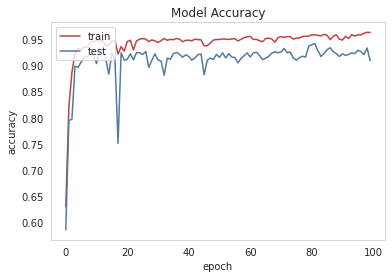

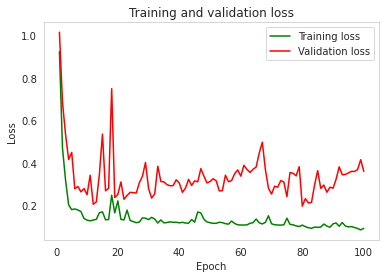

In [46]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('results_images/accuracy_basic_LSTM.pdf', dpi=200)
plt.grid(False)
plt.show()
# summarize history for loss
def plot_curves(hist):
  loss = hist.history['loss']
  val_loss = hist.history['val_loss']
  epochs = range(1, len(loss) + 1)


  plt.figure()
  plt.plot(epochs, loss, 'g', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(loc='upper right')
  plt.savefig('results_images/modelTVloss_basic_LSTM.pdf', dpi=200) 
  plt.grid(False)
  plt.show()

plot_curves(hist)

In [47]:
#Multi layer LSTM 
model1 = Sequential()
model1.add(LSTM(100,return_sequences=True,input_shape=(timesteps, input_dim)))
model1.add(Dropout(0.5))
model1.add(LSTM(128,input_shape=(timesteps, input_dim)))
model1.add(Dropout(0.5))
model1.add(Dense(n_classes, activation='softmax'))
# Compiling the model
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
               metrics=['accuracy',f1_m,precision_m, recall_m])
# Used as a loss function for multi-class classification model where there are two or more output labels
model1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128, 100)          44000     
                                                                 
 dropout_1 (Dropout)         (None, 128, 100)          0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 162,022
Trainable params: 162,022
Non-trainable params: 0
_________________________________________________________________


In [48]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True,to_file="results_images/multi_layer_LSTM.pdf", dpi=120)

In [49]:
# Training the model
hist = model1.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Epoch 1/100
230/230 [==============================] - 39s 157ms/step - loss: 0.8928 - accuracy: 0.6201 - f1_m: 0.5613 - precision_m: 0.7787 - recall_m: 0.4670 - val_loss: 0.7617 - val_accuracy: 0.6919 - val_f1_m: 0.6614 - val_precision_m: 0.7398 - val_recall_m: 0.6127
Epoch 2/100
230/230 [==============================] - 36s 155ms/step - loss: 0.4863 - accuracy: 0.8169 - f1_m: 0.8091 - precision_m: 0.8386 - recall_m: 0.7833 - val_loss: 0.5408 - val_accuracy: 0.8127 - val_f1_m: 0.8119 - val_precision_m: 0.8263 - val_recall_m: 0.7994
Epoch 3/100
230/230 [==============================] - 36s 155ms/step - loss: 0.2697 - accuracy: 0.9072 - f1_m: 0.9077 - precision_m: 0.9135 - recall_m: 0.9021 - val_loss: 0.4098 - val_accuracy: 0.8809 - val_f1_m: 0.8817 - val_precision_m: 0.8836 - val_recall_m: 0.8800
Epoch 4/100
230/230 [==============================] - 36s 155ms/step - loss: 0.1838 - accuracy: 0.9358 - f1_m: 0.9355 - precision_m: 0.9372 - recall_m: 0.9338 - val_loss: 0.7637 - val_accur

230/230 [==============================] - 36s 156ms/step - loss: 0.1248 - accuracy: 0.9471 - f1_m: 0.9470 - precision_m: 0.9471 - recall_m: 0.9469 - val_loss: 0.3272 - val_accuracy: 0.9237 - val_f1_m: 0.9243 - val_precision_m: 0.9253 - val_recall_m: 0.9234
Epoch 32/100
230/230 [==============================] - 36s 156ms/step - loss: 0.1228 - accuracy: 0.9446 - f1_m: 0.9441 - precision_m: 0.9447 - recall_m: 0.9436 - val_loss: 0.3324 - val_accuracy: 0.9192 - val_f1_m: 0.9200 - val_precision_m: 0.9203 - val_recall_m: 0.9197
Epoch 33/100
230/230 [==============================] - 36s 156ms/step - loss: 0.1313 - accuracy: 0.9425 - f1_m: 0.9425 - precision_m: 0.9429 - recall_m: 0.9421 - val_loss: 0.3186 - val_accuracy: 0.9250 - val_f1_m: 0.9257 - val_precision_m: 0.9260 - val_recall_m: 0.9254
Epoch 34/100
230/230 [==============================] - 36s 157ms/step - loss: 0.1171 - accuracy: 0.9494 - f1_m: 0.9490 - precision_m: 0.9496 - recall_m: 0.9484 - val_loss: 0.3325 - val_accuracy: 0.91

230/230 [==============================] - 36s 157ms/step - loss: 0.1137 - accuracy: 0.9547 - f1_m: 0.9547 - precision_m: 0.9548 - recall_m: 0.9546 - val_loss: 0.3597 - val_accuracy: 0.9091 - val_f1_m: 0.9101 - val_precision_m: 0.9102 - val_recall_m: 0.9099
Epoch 62/100
230/230 [==============================] - 36s 157ms/step - loss: 0.1149 - accuracy: 0.9543 - f1_m: 0.9543 - precision_m: 0.9545 - recall_m: 0.9541 - val_loss: 0.3854 - val_accuracy: 0.9141 - val_f1_m: 0.9150 - val_precision_m: 0.9150 - val_recall_m: 0.9150
Epoch 63/100
230/230 [==============================] - 36s 157ms/step - loss: 0.1072 - accuracy: 0.9540 - f1_m: 0.9539 - precision_m: 0.9540 - recall_m: 0.9538 - val_loss: 0.4071 - val_accuracy: 0.9118 - val_f1_m: 0.9127 - val_precision_m: 0.9127 - val_recall_m: 0.9126
Epoch 64/100
230/230 [==============================] - 36s 157ms/step - loss: 0.1017 - accuracy: 0.9540 - f1_m: 0.9542 - precision_m: 0.9543 - recall_m: 0.9541 - val_loss: 0.4147 - val_accuracy: 0.91

230/230 [==============================] - 36s 156ms/step - loss: 0.1525 - accuracy: 0.9452 - f1_m: 0.9452 - precision_m: 0.9458 - recall_m: 0.9447 - val_loss: 0.2447 - val_accuracy: 0.9179 - val_f1_m: 0.9182 - val_precision_m: 0.9188 - val_recall_m: 0.9177
Epoch 92/100
230/230 [==============================] - 36s 157ms/step - loss: 0.1236 - accuracy: 0.9514 - f1_m: 0.9514 - precision_m: 0.9518 - recall_m: 0.9509 - val_loss: 0.2753 - val_accuracy: 0.9182 - val_f1_m: 0.9183 - val_precision_m: 0.9186 - val_recall_m: 0.9180
Epoch 93/100
230/230 [==============================] - 36s 159ms/step - loss: 0.1040 - accuracy: 0.9581 - f1_m: 0.9582 - precision_m: 0.9582 - recall_m: 0.9581 - val_loss: 0.2789 - val_accuracy: 0.9257 - val_f1_m: 0.9264 - val_precision_m: 0.9264 - val_recall_m: 0.9264
Epoch 94/100
230/230 [==============================] - 36s 157ms/step - loss: 0.1156 - accuracy: 0.9563 - f1_m: 0.9563 - precision_m: 0.9563 - recall_m: 0.9563 - val_loss: 0.2989 - val_accuracy: 0.92

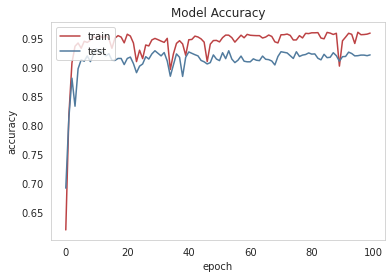

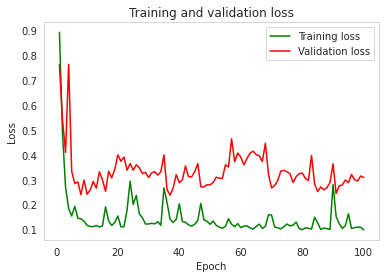

In [50]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('results_images/accuracy_multi_layer_LSTM.pdf', dpi=200)
plt.grid(False)
plt.show()
# summarize history for loss
def plot_curves(hist):
  loss = hist.history['loss']
  val_loss = hist.history['val_loss']
  epochs = range(1, len(loss) + 1)


  plt.figure()
  plt.plot(epochs, loss, 'g', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(loc='upper right')
  plt.savefig('results_images/modelTVloss_multilayer_LSTM.pdf', dpi=200) 
  plt.grid(False)
  plt.show()

plot_curves(hist)

# Using CNN

In [51]:
# Importing libraries
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D , MaxPooling1D , LSTM, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam


In [52]:
X_train, Y_train, X_val, Y_val = load_data()

In [53]:
###Scling data
from sklearn.base import BaseEstimator, TransformerMixin
class scaling_tseries_data(BaseEstimator, TransformerMixin):
    from sklearn.preprocessing import StandardScaler
    def __init__(self):
        self.scale = None

    def transform(self, X):
        temp_X1 = X.reshape((X.shape[0] * X.shape[1], X.shape[2]))
        temp_X1 = self.scale.transform(temp_X1)
        return temp_X1.reshape(X.shape)

    def fit(self, X):
        # remove overlaping
        remove = int(X.shape[1] / 2)
        temp_X = X[:, -remove:, :]
        # flatten data
        temp_X = temp_X.reshape((temp_X.shape[0] * temp_X.shape[1], temp_X.shape[2]))
        scale = StandardScaler()
        scale.fit(temp_X)
        self.scale = scale
        return self

In [54]:
Scale = scaling_tseries_data() ## we are no more using scaled data
Scale.fit(X_train)
X_train_sc = Scale.transform(X_train)
X_val_sc = Scale.transform(X_val)

In [55]:
print('Shape of scaled X train',X_train_sc.shape)
print('Shape of scaled X test',X_val_sc.shape)

Shape of scaled X train (7352, 128, 9)
Shape of scaled X test (2947, 128, 9)


# Base Model

In [56]:
model2 = Sequential()
model2.add(Conv1D(filters=64, kernel_size=3, activation='relu',kernel_initializer='he_uniform',input_shape=(128,9)))
model2.add(Conv1D(filters=128, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model2.add(Dropout(0.6))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(50, activation='relu'))
model2.add(Dense(6, activation='softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 126, 64)           1792      
                                                                 
 conv1d_1 (Conv1D)           (None, 124, 128)          24704     
                                                                 
 dropout_3 (Dropout)         (None, 124, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 62, 128)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7936)              0         
                                                                 
 dense_2 (Dense)             (None, 50)                396850    
                                                      

In [57]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True,to_file="results_images/Model_CNN.pdf", dpi=120)

In [58]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])
## Used as a loss function for multi-class classification model where there are two or more output labels

In [59]:
hist = model2.fit(X_train,Y_train, epochs=100, batch_size=32,validation_data=(X_test, Y_test), verbose=1)

Epoch 1/100
230/230 [==============================] - 4s 16ms/step - loss: 0.3863 - accuracy: 0.8443 - f1_m: 0.8379 - precision_m: 0.8657 - recall_m: 0.8157 - val_loss: 0.4215 - val_accuracy: 0.8809 - val_f1_m: 0.8784 - val_precision_m: 0.8874 - val_recall_m: 0.8703
Epoch 2/100
230/230 [==============================] - 3s 15ms/step - loss: 0.1368 - accuracy: 0.9436 - f1_m: 0.9435 - precision_m: 0.9443 - recall_m: 0.9427 - val_loss: 0.3957 - val_accuracy: 0.8972 - val_f1_m: 0.8956 - val_precision_m: 0.8993 - val_recall_m: 0.8925
Epoch 3/100
230/230 [==============================] - 3s 15ms/step - loss: 0.1145 - accuracy: 0.9524 - f1_m: 0.9521 - precision_m: 0.9527 - recall_m: 0.9515 - val_loss: 0.4163 - val_accuracy: 0.9030 - val_f1_m: 0.9030 - val_precision_m: 0.9056 - val_recall_m: 0.9005
Epoch 4/100
230/230 [==============================] - 3s 15ms/step - loss: 0.1038 - accuracy: 0.9574 - f1_m: 0.9575 - precision_m: 0.9576 - recall_m: 0.9575 - val_loss: 0.4686 - val_accuracy: 0.8

230/230 [==============================] - 3s 14ms/step - loss: 0.0380 - accuracy: 0.9830 - f1_m: 0.9830 - precision_m: 0.9830 - recall_m: 0.9830 - val_loss: 0.4369 - val_accuracy: 0.9050 - val_f1_m: 0.9060 - val_precision_m: 0.9064 - val_recall_m: 0.9056
Epoch 32/100
230/230 [==============================] - 3s 14ms/step - loss: 0.0367 - accuracy: 0.9825 - f1_m: 0.9824 - precision_m: 0.9824 - recall_m: 0.9824 - val_loss: 0.5040 - val_accuracy: 0.9250 - val_f1_m: 0.9255 - val_precision_m: 0.9259 - val_recall_m: 0.9251
Epoch 33/100
230/230 [==============================] - 3s 14ms/step - loss: 0.0405 - accuracy: 0.9841 - f1_m: 0.9840 - precision_m: 0.9841 - recall_m: 0.9840 - val_loss: 0.4867 - val_accuracy: 0.9121 - val_f1_m: 0.9135 - val_precision_m: 0.9144 - val_recall_m: 0.9126
Epoch 34/100
230/230 [==============================] - 3s 14ms/step - loss: 0.0311 - accuracy: 0.9856 - f1_m: 0.9855 - precision_m: 0.9855 - recall_m: 0.9855 - val_loss: 0.4399 - val_accuracy: 0.9287 - val

230/230 [==============================] - 3s 14ms/step - loss: 0.0137 - accuracy: 0.9954 - f1_m: 0.9954 - precision_m: 0.9954 - recall_m: 0.9954 - val_loss: 0.9061 - val_accuracy: 0.9016 - val_f1_m: 0.9023 - val_precision_m: 0.9027 - val_recall_m: 0.9019
Epoch 62/100
230/230 [==============================] - 3s 14ms/step - loss: 0.0239 - accuracy: 0.9905 - f1_m: 0.9905 - precision_m: 0.9905 - recall_m: 0.9905 - val_loss: 0.8195 - val_accuracy: 0.9209 - val_f1_m: 0.9223 - val_precision_m: 0.9229 - val_recall_m: 0.9217
Epoch 63/100
230/230 [==============================] - 3s 14ms/step - loss: 0.0191 - accuracy: 0.9937 - f1_m: 0.9937 - precision_m: 0.9937 - recall_m: 0.9937 - val_loss: 1.0848 - val_accuracy: 0.9043 - val_f1_m: 0.9053 - val_precision_m: 0.9054 - val_recall_m: 0.9052
Epoch 64/100
230/230 [==============================] - 3s 14ms/step - loss: 0.0192 - accuracy: 0.9936 - f1_m: 0.9936 - precision_m: 0.9936 - recall_m: 0.9936 - val_loss: 1.1834 - val_accuracy: 0.9145 - val

230/230 [==============================] - 3s 14ms/step - loss: 0.0104 - accuracy: 0.9974 - f1_m: 0.9974 - precision_m: 0.9974 - recall_m: 0.9974 - val_loss: 1.4827 - val_accuracy: 0.8935 - val_f1_m: 0.8946 - val_precision_m: 0.8948 - val_recall_m: 0.8945
Epoch 92/100
230/230 [==============================] - 3s 14ms/step - loss: 0.0092 - accuracy: 0.9967 - f1_m: 0.9967 - precision_m: 0.9967 - recall_m: 0.9967 - val_loss: 1.1745 - val_accuracy: 0.9162 - val_f1_m: 0.9168 - val_precision_m: 0.9170 - val_recall_m: 0.9167
Epoch 93/100
230/230 [==============================] - 3s 14ms/step - loss: 0.0066 - accuracy: 0.9976 - f1_m: 0.9976 - precision_m: 0.9976 - recall_m: 0.9976 - val_loss: 1.1278 - val_accuracy: 0.9189 - val_f1_m: 0.9198 - val_precision_m: 0.9200 - val_recall_m: 0.9197
Epoch 94/100
230/230 [==============================] - 3s 14ms/step - loss: 0.0089 - accuracy: 0.9985 - f1_m: 0.9985 - precision_m: 0.9985 - recall_m: 0.9985 - val_loss: 1.6680 - val_accuracy: 0.9097 - val

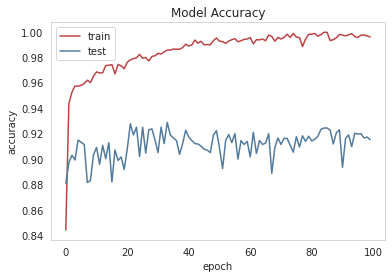

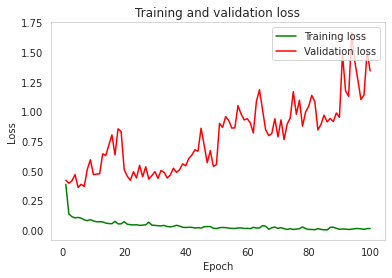

In [60]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('results_images/accuracy_CNN.pdf', dpi=200)
plt.grid(False)
plt.show()
# summarize history for loss
def plot_curves(hist):
  loss = hist.history['loss']
  val_loss = hist.history['val_loss']
  epochs = range(1, len(loss) + 1)


  plt.figure()
  plt.plot(epochs, loss, 'g', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(loc='upper right')
  plt.savefig('results_images/modelTVloss_CNN.pdf', dpi=200) 
  plt.grid(False)
  plt.show()

plot_curves(hist)

# Mixed_mltimodel approach

In [61]:
model3 = Sequential()
model3.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(128,9)))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model3.add(Dropout(0.5))
model3.add(MaxPooling1D(pool_size=2))
model3.add(LSTM(100,input_shape=(timesteps, input_dim)))
model3.add(Dropout(0.5))
model3.add(Flatten())
model.add(Dense(50, activation='relu'))
model3.add(Dense(6, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])
# Used as a loss function for multi-class classification model where there are two or more output labels
print(model3.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 128, 64)           1792      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 64, 64)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 64, 128)           24704     
                                                                 
 dropout_4 (Dropout)         (None, 64, 128)           0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 32, 128)          0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 100)              

In [62]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True,to_file="results_images/modelCNN+LSTM.pdf", dpi=120)

In [63]:
#hist = model3.fit(X_train,y_train,batch_size=64,epochs=10,validation_data=(X_test, y_test))
hist = model3.fit(X_train,Y_train, epochs=100, batch_size=64,validation_data=(X_test, Y_test), verbose=1)

Epoch 1/100
115/115 [==============================] - 7s 44ms/step - loss: 0.6838 - accuracy: 0.7140 - f1_m: 0.6568 - precision_m: 0.7710 - recall_m: 0.6055 - val_loss: 0.5165 - val_accuracy: 0.8107 - val_f1_m: 0.8064 - val_precision_m: 0.8259 - val_recall_m: 0.7892
Epoch 2/100
115/115 [==============================] - 5s 42ms/step - loss: 0.2667 - accuracy: 0.9091 - f1_m: 0.9074 - precision_m: 0.9141 - recall_m: 0.9009 - val_loss: 0.4147 - val_accuracy: 0.8493 - val_f1_m: 0.8527 - val_precision_m: 0.8637 - val_recall_m: 0.8424
Epoch 3/100
115/115 [==============================] - 5s 43ms/step - loss: 0.2016 - accuracy: 0.9287 - f1_m: 0.9291 - precision_m: 0.9327 - recall_m: 0.9255 - val_loss: 0.3391 - val_accuracy: 0.8836 - val_f1_m: 0.8864 - val_precision_m: 0.8917 - val_recall_m: 0.8813
Epoch 4/100
115/115 [==============================] - 5s 43ms/step - loss: 0.1480 - accuracy: 0.9429 - f1_m: 0.9436 - precision_m: 0.9454 - recall_m: 0.9419 - val_loss: 0.3994 - val_accuracy: 0.8

115/115 [==============================] - 5s 42ms/step - loss: 0.0889 - accuracy: 0.9573 - f1_m: 0.9574 - precision_m: 0.9575 - recall_m: 0.9573 - val_loss: 0.2772 - val_accuracy: 0.9220 - val_f1_m: 0.9229 - val_precision_m: 0.9237 - val_recall_m: 0.9222
Epoch 32/100
115/115 [==============================] - 5s 42ms/step - loss: 0.1029 - accuracy: 0.9508 - f1_m: 0.9508 - precision_m: 0.9511 - recall_m: 0.9504 - val_loss: 0.4377 - val_accuracy: 0.9087 - val_f1_m: 0.9108 - val_precision_m: 0.9121 - val_recall_m: 0.9096
Epoch 33/100
115/115 [==============================] - 5s 42ms/step - loss: 0.0905 - accuracy: 0.9561 - f1_m: 0.9560 - precision_m: 0.9562 - recall_m: 0.9558 - val_loss: 0.3191 - val_accuracy: 0.9141 - val_f1_m: 0.9151 - val_precision_m: 0.9160 - val_recall_m: 0.9142
Epoch 34/100
115/115 [==============================] - 5s 42ms/step - loss: 0.0874 - accuracy: 0.9563 - f1_m: 0.9560 - precision_m: 0.9566 - recall_m: 0.9555 - val_loss: 0.2878 - val_accuracy: 0.9155 - val

115/115 [==============================] - 5s 42ms/step - loss: 0.0574 - accuracy: 0.9717 - f1_m: 0.9717 - precision_m: 0.9718 - recall_m: 0.9716 - val_loss: 0.3743 - val_accuracy: 0.9121 - val_f1_m: 0.9138 - val_precision_m: 0.9141 - val_recall_m: 0.9136
Epoch 62/100
115/115 [==============================] - 5s 43ms/step - loss: 0.0505 - accuracy: 0.9744 - f1_m: 0.9744 - precision_m: 0.9746 - recall_m: 0.9743 - val_loss: 0.4877 - val_accuracy: 0.9101 - val_f1_m: 0.9122 - val_precision_m: 0.9124 - val_recall_m: 0.9119
Epoch 63/100
115/115 [==============================] - 5s 42ms/step - loss: 0.0502 - accuracy: 0.9766 - f1_m: 0.9766 - precision_m: 0.9766 - recall_m: 0.9766 - val_loss: 0.5182 - val_accuracy: 0.8897 - val_f1_m: 0.8920 - val_precision_m: 0.8920 - val_recall_m: 0.8920
Epoch 64/100
115/115 [==============================] - 5s 42ms/step - loss: 0.0776 - accuracy: 0.9625 - f1_m: 0.9626 - precision_m: 0.9629 - recall_m: 0.9622 - val_loss: 0.4278 - val_accuracy: 0.9186 - val

115/115 [==============================] - 5s 42ms/step - loss: 0.0359 - accuracy: 0.9820 - f1_m: 0.9820 - precision_m: 0.9821 - recall_m: 0.9819 - val_loss: 0.5827 - val_accuracy: 0.9050 - val_f1_m: 0.9072 - val_precision_m: 0.9076 - val_recall_m: 0.9069
Epoch 92/100
115/115 [==============================] - 5s 42ms/step - loss: 0.0358 - accuracy: 0.9841 - f1_m: 0.9841 - precision_m: 0.9842 - recall_m: 0.9839 - val_loss: 0.4796 - val_accuracy: 0.9148 - val_f1_m: 0.9167 - val_precision_m: 0.9169 - val_recall_m: 0.9166
Epoch 93/100
115/115 [==============================] - 5s 42ms/step - loss: 0.0343 - accuracy: 0.9844 - f1_m: 0.9841 - precision_m: 0.9844 - recall_m: 0.9838 - val_loss: 0.5688 - val_accuracy: 0.9053 - val_f1_m: 0.9072 - val_precision_m: 0.9075 - val_recall_m: 0.9069
Epoch 94/100
115/115 [==============================] - 5s 42ms/step - loss: 0.0318 - accuracy: 0.9856 - f1_m: 0.9855 - precision_m: 0.9857 - recall_m: 0.9853 - val_loss: 0.5733 - val_accuracy: 0.9080 - val

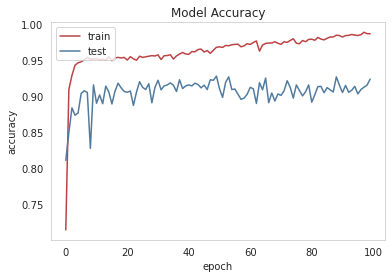

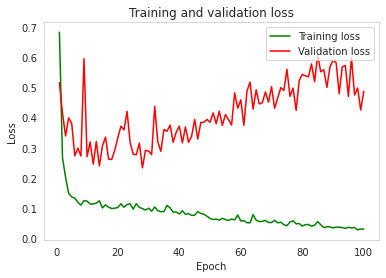

In [64]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('results_images/accuracyCNN+LSTM.pdf', dpi=200)
plt.grid(False)
plt.show()
# summarize history for loss
def plot_curves(hist):
  loss = hist.history['loss']
  val_loss = hist.history['val_loss']
  epochs = range(1, len(loss) + 1)


  plt.figure()
  plt.plot(epochs, loss, 'g', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(loc='upper right')
  plt.savefig('results_images/modelTVlossCNN+LSTM.pdf', dpi=200) 
  plt.grid(False)
  plt.show()

plot_curves(hist)

In [65]:
X_train, Y_train, X_val, Y_val = load_data()

In [66]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix_rnn(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    #return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])
    return metrics.confusion_matrix(Y_true, Y_pred)

In [70]:
# Confusion Matrix
print(confusion_matrix_rnn(Y_val, model1.predict(X_val)))

[[537   0   0   0   0   0]
 [  1 408  81   0   0   1]
 [  0 106 426   0   0   0]
 [  0   0   1 467  27   1]
 [  0   0   0   2 413   5]
 [  0   6   0   1   1 463]]


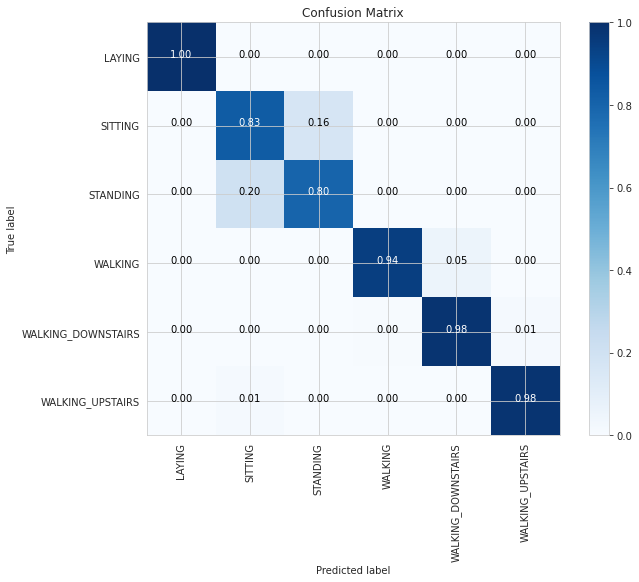

In [71]:
from sklearn import metrics
plt.figure(figsize=(10,8))
cm = confusion_matrix_rnn(Y_val, model1.predict(X_val))
plot_confusion_matrix(cm, classes=labels, normalize=True, title='Confusion Matrix', cmap = plt.cm.Blues)
plt.show()

In [72]:
# Confusion Matrix
print(confusion_matrix_rnn(Y_val, model2.predict(X_val)))

[[510   0   0   0   0  27]
 [  0 386  80   1   0  24]
 [  0  52 479   1   0   0]
 [  0   1   0 469  24   2]
 [  0   0   0   0 418   2]
 [  1   1   0   4  30 435]]


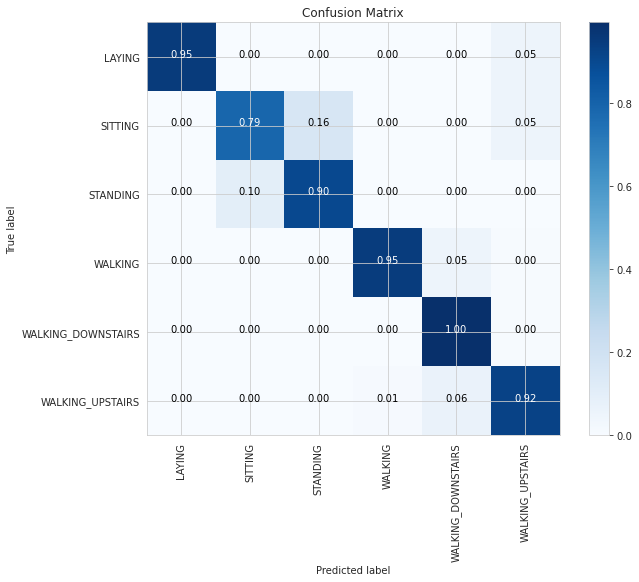

In [73]:
from sklearn import metrics
plt.figure(figsize=(10,8))
cm = confusion_matrix_rnn(Y_val, model2.predict(X_val))
plot_confusion_matrix(cm, classes=labels, normalize=True, title='Confusion Matrix', cmap = plt.cm.Blues)
plt.show()

In [74]:
# Confusion Matrix
print(confusion_matrix_rnn(Y_val, model3.predict(X_val)))

[[510   0   0   0   0  27]
 [  0 390  89   0   0  12]
 [  0  50 480   1   0   1]
 [  0   0   0 491   5   0]
 [  0   0   0   5 413   2]
 [  0   0   0   9  24 438]]


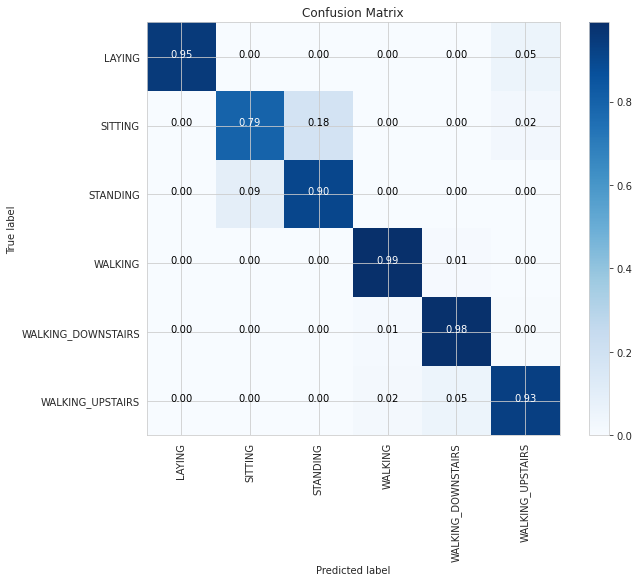

In [75]:
from sklearn import metrics
plt.figure(figsize=(10,8))
cm = confusion_matrix_rnn(Y_val, model3.predict(X_val))
plot_confusion_matrix(cm, classes=labels, normalize=True, title='Confusion Matrix', cmap = plt.cm.Blues)
plt.show()

In [76]:
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy_model: {:.2f}%".format(scores[1]*100))
scores, model.metrics_names

from sklearn.metrics import accuracy_score
predictions = model.predict(X_test)  # this is outdated to version 2.5 and above for tensorflow


93/93 [==============================] - 3s 36ms/step - loss: 0.3595 - accuracy: 0.9091 - f1_m: 0.9081 - precision_m: 0.9119 - recall_m: 0.9047
Accuracy_model: 90.91%


In [77]:
scores = model1.evaluate(X_test, Y_test, verbose=1)
print("Accuracy_model1: {:.2f}%".format(scores[1]*100))
scores, model1.metrics_names


from sklearn.metrics import accuracy_score
predictions = model1.predict(X_test)  
predictions = (model1.predict(X_test) > 0.5).astype("int32")
accuracy_score(Y_test, predictions)

93/93 [==============================] - 6s 63ms/step - loss: 0.3090 - accuracy: 0.9209 - f1_m: 0.9215 - precision_m: 0.9217 - recall_m: 0.9214
Accuracy_model1: 92.09%


0.9205972175093315

In [78]:
scores = model2.evaluate(X_test, Y_test, verbose=1)
print("Accuracy_model2: {:.2f}%".format(scores[1]*100))
scores, model2.metrics_names


from sklearn.metrics import accuracy_score
predictions = model2.predict(X_test)  
predictions = (model2.predict(X_test) > 0.5).astype("int32")
accuracy_score(Y_test, predictions)

93/93 [==============================] - 1s 6ms/step - loss: 1.3422 - accuracy: 0.9152 - f1_m: 0.9159 - precision_m: 0.9166 - recall_m: 0.9153
Accuracy_model2: 91.52%


0.9144893111638955

In [79]:
scores = model3.evaluate(X_test, Y_test, verbose=1)
print("Accuracy_model2: {:.2f}%".format(scores[1]*100))
scores, model3.metrics_names


from sklearn.metrics import accuracy_score
predictions = model3.predict(X_test)  
predictions = (model3.predict(X_test) > 0.5).astype("int32")
accuracy_score( Y_test, predictions)

93/93 [==============================] - 1s 11ms/step - loss: 0.4877 - accuracy: 0.9237 - f1_m: 0.9244 - precision_m: 0.9244 - recall_m: 0.9244
Accuracy_model2: 92.37%


0.9236511706820495